In [1]:
##Exercise 4

#(a)

import psycopg2
import wrds
import numpy as np
import matplotlib.pyplot as plt

db=wrds.Connection(wrds_username='zimushko')
#db.create_pgpass_file()

Loading library list...
Done


In [2]:
#(b) 
import pandas as pd

#getting data from wrds
apple=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (7) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
gs=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (35048) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
msft=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (8048) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
pg=db.raw_sql("select  date, ret " "from crsp.dsf " "where permco in (21446) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
ge=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (20792) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")

#rename the columns
apple=apple.rename(index=apple["date"], columns={"ret": "Apple"})
gs=gs.rename(index=gs["date"], columns={"ret": "GS"})
msft=msft.rename(index=msft["date"], columns={"ret": "Msft"})
pg=pg.rename(index=pg["date"], columns={"ret": "PG"})
ge=ge.rename(index=pg["date"], columns={"ret": "GE"})

#merge into one table
df1=pd.merge(apple, gs, on='date')
df2=pd.merge(df1, msft, on='date')
df3=pd.merge(df2, pg, on='date')
S=pd.merge(df3, ge, on='date')

In [3]:
#(c) 
S.to_csv('returns.csv', sep=';', index=False)

In [4]:
#(d) 
S = pd.read_csv('returns.csv', sep=';') 

In [5]:
#(e)

#changing the date format
S['date']=pd.to_datetime(S['date'], format='%Y-%m-%d')
S=S.set_index('date')

#obtaining gross cummulative returns 
S=S+1
S=S.cumprod()

#obtaining daily, weekly and monthly log returns
dailylogret = np.log(S).diff()
S1=S.resample('M').last()
S2=S.resample('W').last()
monthlylogret=np.log(S1).diff() 
weeklylogret=np.log(S2).diff()

In [6]:
#Summary statistics
dailylogret.describe()

,Apple,GS,Msft,PG,GE
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000
mean,0.001264,0.000240,0.000552,0.000359,-0.000156
std,0.023162,0.022619,0.018262,0.011856,0.021009
min,-0.197470,-0.210223,-0.159453,-0.091428,-0.164394
25%,-0.009673,-0.009835,-0.007784,-0.005021,-0.008495
50%,0.000950,0.000340,0.000380,0.000371,0.000000
75%,0.012616,0.010666,0.008924,0.005960,0.008370
max,0.130194,0.234818,0.170626,0.113409,0.179844


In [8]:
weeklylogret.describe()

,Apple,GS,Msft,PG,GE
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.006007,0.001086,0.002543,0.001778,-0.000828
std,0.048566,0.047977,0.035853,0.024249,0.044985
min,-0.278471,-0.365644,-0.202276,-0.175977,-0.228878
25%,-0.021420,-0.022785,-0.015779,-0.009548,-0.019237
50%,0.007949,0.003336,0.002363,0.002306,-0.000325
75%,0.034618,0.025478,0.021650,0.014688,0.020827
max,0.236207,0.393197,0.149357,0.122933,0.309399


In [9]:
monthlylogret.describe()

,Apple,GS,Msft,PG,GE
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.025052,0.004512,0.010189,0.007917,-0.003494
std,0.101977,0.086816,0.068223,0.042397,0.087692
min,-0.399818,-0.321603,-0.178358,-0.123464,-0.324090
25%,-0.032658,-0.051402,-0.035698,-0.018670,-0.045344
50%,0.040119,0.015279,0.018394,0.009023,-0.003726
75%,0.093091,0.055757,0.052848,0.034465,0.043256
max,0.301776,0.210329,0.222736,0.112685,0.316246


In [10]:
print('Annualized estimated mean daily log-return', dailylogret.mean()*252)

Annualized estimated mean daily log-return Apple    0.318647
GS       0.060402
Msft     0.139111
PG       0.090586
GE      -0.039333
dtype: float64


In [11]:
print('Annualized estimated mean weakly log-return ', weeklylogret.mean()*52)

Annualized estimated mean weakly log-return  Apple    0.312373
GS       0.056466
Msft     0.132257
PG       0.092480
GE      -0.043053
dtype: float64


In [12]:
print('Annualized estimated mean monthly log-return ', monthlylogret.mean()*12)

Annualized estimated mean monthly log-return  Apple    0.300622
GS       0.054148
Msft     0.122271
PG       0.095004
GE      -0.041923
dtype: float64


In [13]:
print('Annualized std deviation of daily log returns', np.std(dailylogret)*np.sqrt(252))

Annualized std deviation of daily log returns Apple    0.367651
GS       0.359035
Msft     0.289865
PG       0.188197
GE       0.333480
dtype: float64


In [14]:
print('Annualized std deviation of weekly log returns', np.std(weeklylogret)*np.sqrt(52))

Annualized std deviation of weekly log returns Apple    0.350049
GS       0.345802
Msft     0.258412
PG       0.174782
GE       0.324236
dtype: float64


In [15]:
print('Annualized std deviation of monthly log returns', np.std(monthlylogret)*np.sqrt(12))

Annualized std deviation of monthly log returns Apple    0.352517
GS       0.300109
Msft     0.235836
PG       0.146560
GE       0.303139
dtype: float64


Text(0.5, 1.0, 'Time-series of the annualized monthly logreturns estimated using a rolling one-year window')

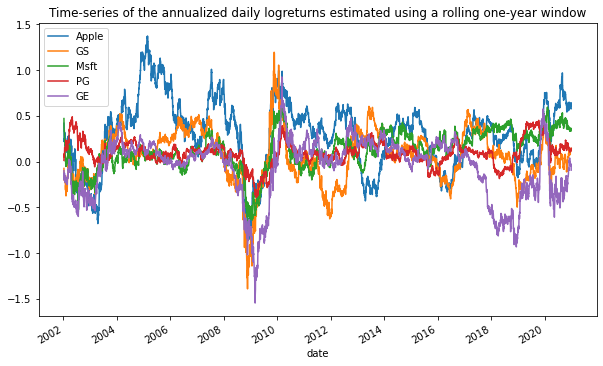

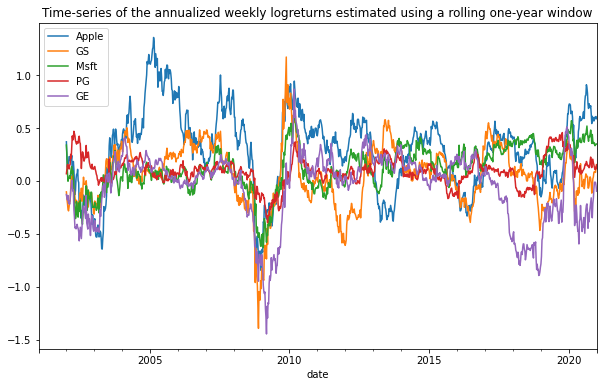

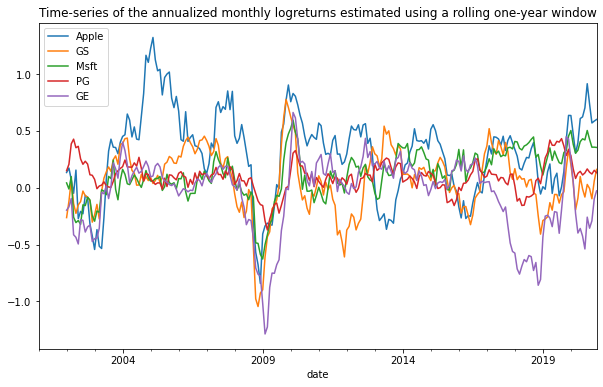

In [16]:
#Plotting the moving average of returns
(dailylogret.rolling(window =252).mean()*252).plot(figsize=(10,6))
plt.title('Time-series of the annualized daily logreturns estimated using a rolling one-year window')
(weeklylogret.rolling(window =52).mean()*52).plot(figsize=(10,6))
plt.title('Time-series of the annualized weekly logreturns estimated using a rolling one-year window')
(monthlylogret.rolling(window =12).mean()*12).plot(figsize=(10,6))
plt.title('Time-series of the annualized monthly logreturns estimated using a rolling one-year window')

Text(0.5, 1.0, 'Еime-series of the annualized std deviation of monthly logreturns estimated using a rolling one-year window')

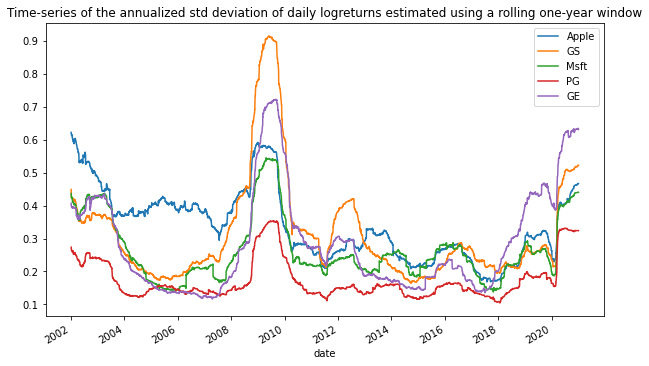

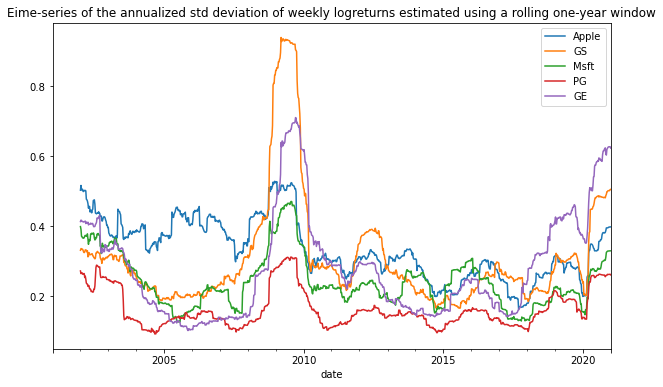

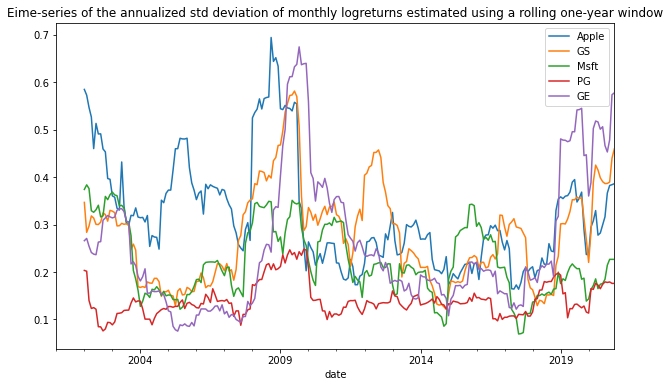

In [17]:
#Plotting the time-series of the std deviation of logreturns estimated using a rolling one-year window
(dailylogret.rolling(window = 252).std()*np.sqrt(252)).plot(figsize=(10,6))
plt.title('Time-series of the annualized std deviation of daily logreturns estimated using a rolling one-year window')
(weeklylogret.rolling(window = 52).std()*np.sqrt(52)).plot(figsize=(10,6))
plt.title('Еime-series of the annualized std deviation of weekly logreturns estimated using a rolling one-year window')
(monthlylogret.rolling(window = 12).std()*np.sqrt(12)).plot(figsize=(10,6))
plt.title('Еime-series of the annualized std deviation of monthly logreturns estimated using a rolling one-year window')